EXPERIMENTO: Se comparan kernels que aplican filtros de manera normal o filtros de manera dividida, con y sin memoria local. Se ha fijado un local size, una imagen y se están cambiando el tamaño de los filtros.


OBJETIVO: Determinar que es mejor aplicar filtros de manera dividida, sobre todo para filtros grandes.


OUTPUT:Tabla con los valores, gráfico comparando.


DONDE: EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS

DESCARGAR PYOPENCL

In [1]:
pip install pyopencl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\maria\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


IMPORTAR LIBRERIAS

In [2]:
import pyopencl as cl
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageFilter
from collections import defaultdict

IMPORTAR ARCHIVOS Y FUNCIONES

In [3]:
import funciones_filtros as ff
import kernels_filtros_imagenes as kernel
import determinar_mejor_local_size as mejor
import filtros as f
import experimento_filtros as ex

VALORES IMPORTANTES A MODIFICAR SEGÚN ORDENADOR

In [4]:
 # Datos GPU
compute_units = 82
processing_elements = 128

#RUTA DE ARCHIVOS
path="C:/Users/maria/OneDrive/OPENCL/RESULTADOS_PORTATIL"

FUNCION PRINCIPAL

DataFrames guardados y formateados en Excel en C:/Users/maria/OneDrive/OPENCL/RESULTADOS_PORTATIL\OPENCL/FILTROS IMAGENES/EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS/resultados.xlsx


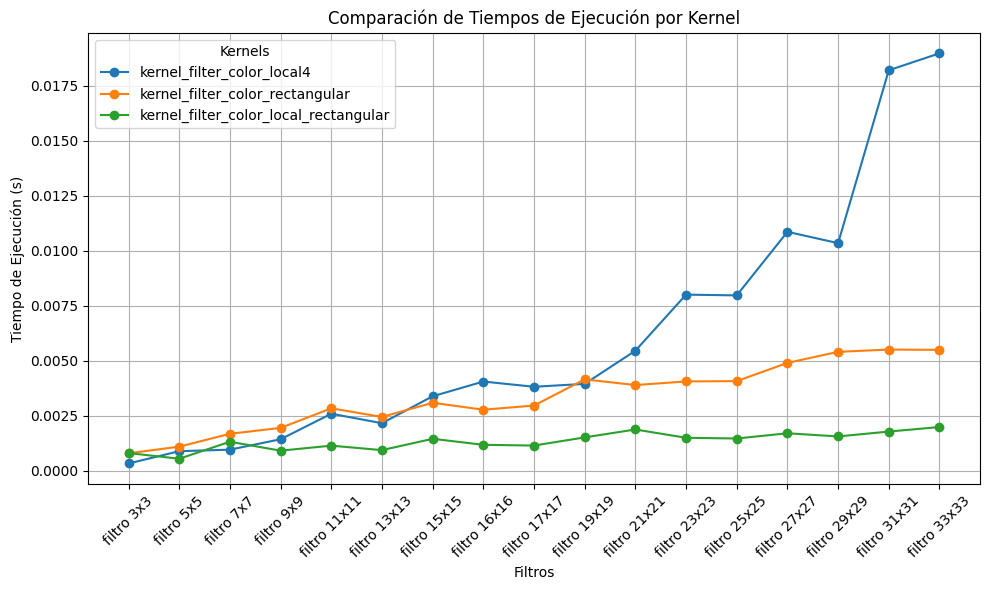

In [5]:


#KERNELS A USAR
kernels_codes = [kernel.kernel_filter_color_local4, kernel.kernel_filter_color_rectangular,kernel.kernel_filter_color_local_rectangular]

#NOMBRES DE LOS KERNELS

kernels_names = ["kernel_filter_color_local4", "kernel_filter_color_rectangular","kernel_filter_color_local_rectangular"]

#FUNCIONES A APLICAR

funciones = [ff.aplicar_filtro_local, ff.aplicar_filtro_color_dividido,ff.aplicar_filtro_local_dividido]

#IMAGEN PARA APLICAR FILTROS

image_path = os.path.join(path, "OPENCL/FILTROS IMAGENES/IMAGENES/imagen800x600.jpg")

#LOCAL SIZE FIJADO

local_size = (8, 8)  # Tamaño local deseado

# Filtros de ejemplo
filtros1 = [
        f.filtro_mean, f.filtro_mean5x5, f.filtro_mean7x7, f.filtro_mean9x9, 
        f.filtro_mean11x11, f.filtro_mean13x13, f.filtro_mean15x15, 
        f.filtro_mean16x16, f.filtro_mean17x17, f.filtro_mean19x19, 
        f.filtro_mean21x21, f.filtro_mean23x23, f.filtro_mean25x25, 
        f.filtro_mean27x27, f.filtro_mean29x29, f.filtro_mean31x31, 
        f.filtro_mean33x33
    ]

filtros2 = [
        (f.filtro_meanX, f.filtro_meanY), 
        (f.filtro_mean5X5X, f.filtro_mean5X5Y), 
        (f.filtro_mean7x7X, f.filtro_mean7x7Y), 
        (f.filtro_mean9x9X, f.filtro_mean9x9Y), 
        (f.filtro_mean11X, f.filtro_mean11Y),
        (f.filtro_mean13X, f.filtro_mean13Y),
        (f.filtro_mean15X, f.filtro_mean15Y),
        (f.filtro_mean16x16X, f.filtro_mean16x16Y),
        (f.filtro_mean17X, f.filtro_mean17Y),
        (f.filtro_mean19X, f.filtro_mean19Y),
        (f.filtro_mean21X, f.filtro_mean21Y),
        (f.filtro_mean23X, f.filtro_mean23Y),
        (f.filtro_mean25X, f.filtro_mean25Y),
        (f.filtro_mean27X, f.filtro_mean27Y),
        (f.filtro_mean29X, f.filtro_mean29Y),
        (f.filtro_mean31X, f.filtro_mean31Y),
        (f.filtro_mean33X, f.filtro_mean33Y)
    ]  # Para filtros divididos

#LLAMAR A LA FUNCION 

save_path = os.path.join(path, "OPENCL/FILTROS IMAGENES/EXPERIMENTOS/RESULTADOS/COMPARACION_KERNELS/COMPARACION FILTROS/")
df_resultados = ex.comparar_filtros(kernels_codes, kernels_names, funciones, image_path, local_size, cl.device_type.GPU, filtros1, filtros2,save_path)

